In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np

try:
    from data.generated.generated_data import *
except ModuleNotFoundError:
    from generated_data import *
    
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

%matplotlib inline
%config IPCompleter.greedy=True


In [2]:
x,y = generate_noisy_nonlinear_dataset()
print(x.shape)
columns = []
for i in range(x.shape[1]):
    columns.append("feature_"+str(i))
df = pd.DataFrame(x, columns=columns)
df['target'] = pd.Series(y)

label = 'target'

(3500, 10)


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  3500 non-null   float64
 1   feature_1  3500 non-null   float64
 2   feature_2  3500 non-null   float64
 3   feature_3  3500 non-null   float64
 4   feature_4  3500 non-null   float64
 5   feature_5  3500 non-null   float64
 6   feature_6  3500 non-null   float64
 7   feature_7  3500 non-null   float64
 8   feature_8  3500 non-null   float64
 9   feature_9  3500 non-null   float64
 10  target     3500 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 300.9 KB


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
count,3500.000000,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3500.000000,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3500.000000
mean,0.035234,9.462454e-03,9.544694e-03,9.197534e-03,1.323185e-02,0.010173,1.032840e-02,1.891883e-02,1.047877e-02,4.798312e-03,0.498857
std,0.070559,3.181281e-02,2.639322e-02,2.785485e-02,4.360938e-02,0.040332,3.560172e-02,4.716576e-02,2.627169e-02,2.504288e-02,0.500070
min,0.000001,5.274887e-07,8.100794e-07,6.409471e-07,5.677329e-07,0.000002,8.134089e-07,5.403249e-07,4.353410e-07,3.229041e-07,0.000000
25%,0.001283,3.933269e-05,4.514127e-05,3.533491e-05,3.974047e-05,0.000043,3.823366e-05,5.201004e-04,5.969781e-05,1.707250e-05,0.000000
50%,0.012957,2.352073e-03,2.410412e-03,6.087401e-04,4.693773e-04,0.000117,1.452099e-04,6.654595e-03,3.599580e-03,4.709956e-05,0.000000
75%,0.038424,8.858139e-03,9.499920e-03,9.590999e-03,1.071794e-02,0.001320,7.707570e-03,1.963251e-02,1.172389e-02,4.841642e-04,1.000000
max,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000


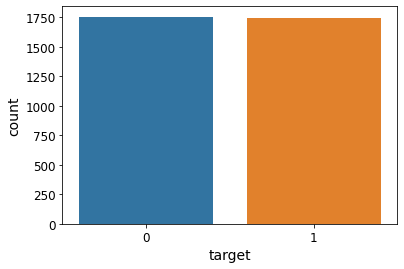

target
0    0.501143
1    0.498857
Name: target, dtype: float64


In [4]:
sns.countplot(x=label, data=df)
plt.show()
print(df.groupby(label)[label].apply(lambda x: x.count()/df.shape[0]))

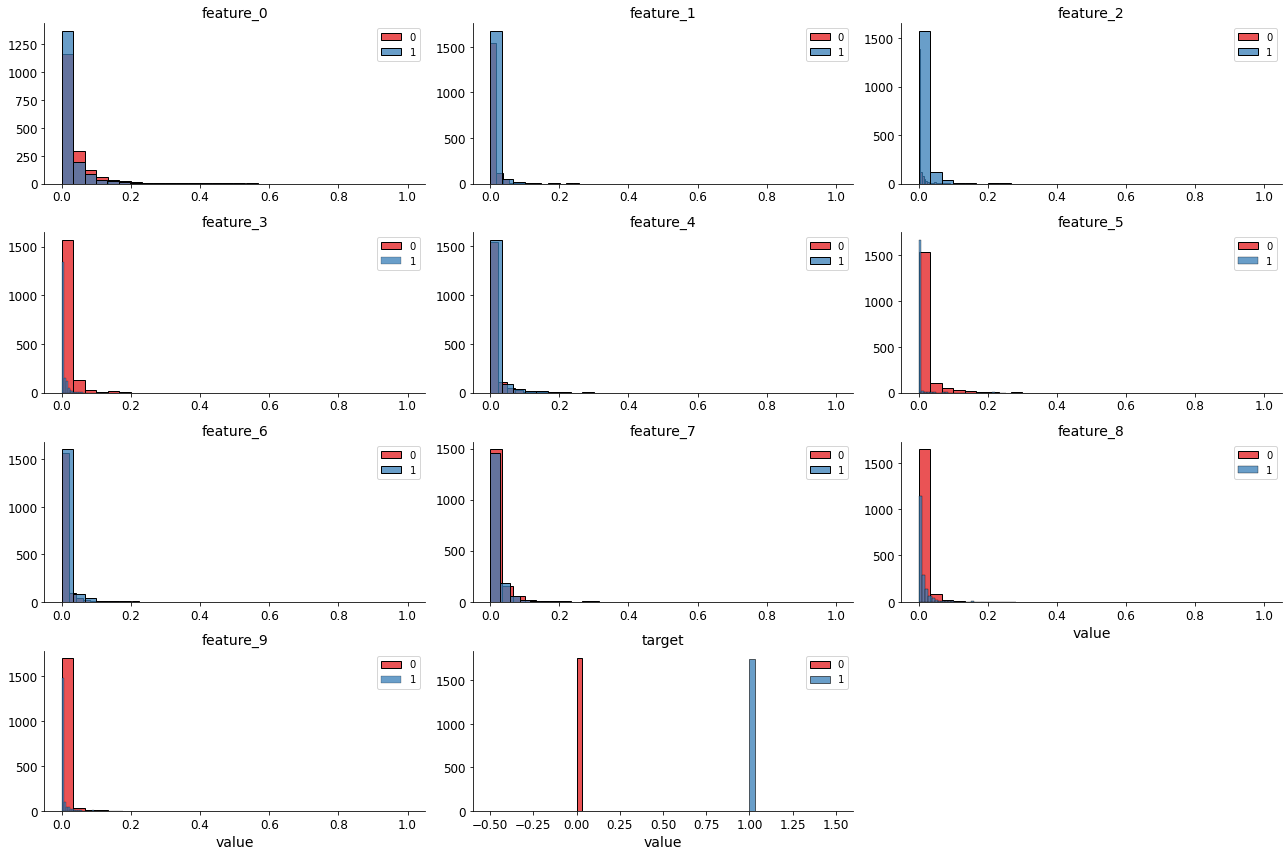

In [5]:
new_df = df.copy()
new_df['quality_index'] = new_df[label]

# plot code from https://stackoverflow.com/questions/45883598/pandas-histogram-df-hist-group-by
df2 = pd.melt(new_df, id_vars='quality_index', value_vars=new_df.drop("quality_index", axis=1).columns, value_name='value')

g = sns.FacetGrid(df2, col="variable", hue="quality_index", palette="Set1", col_wrap=3, sharex=False, sharey=False, aspect=2)
g.map(sns.histplot, 'value', bins=30)
for a in g.axes:
    a.legend()

# Found at https://github.com/mwaskom/seaborn/issues/440
plt.setp(g.fig.texts, text="")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
plt.show()


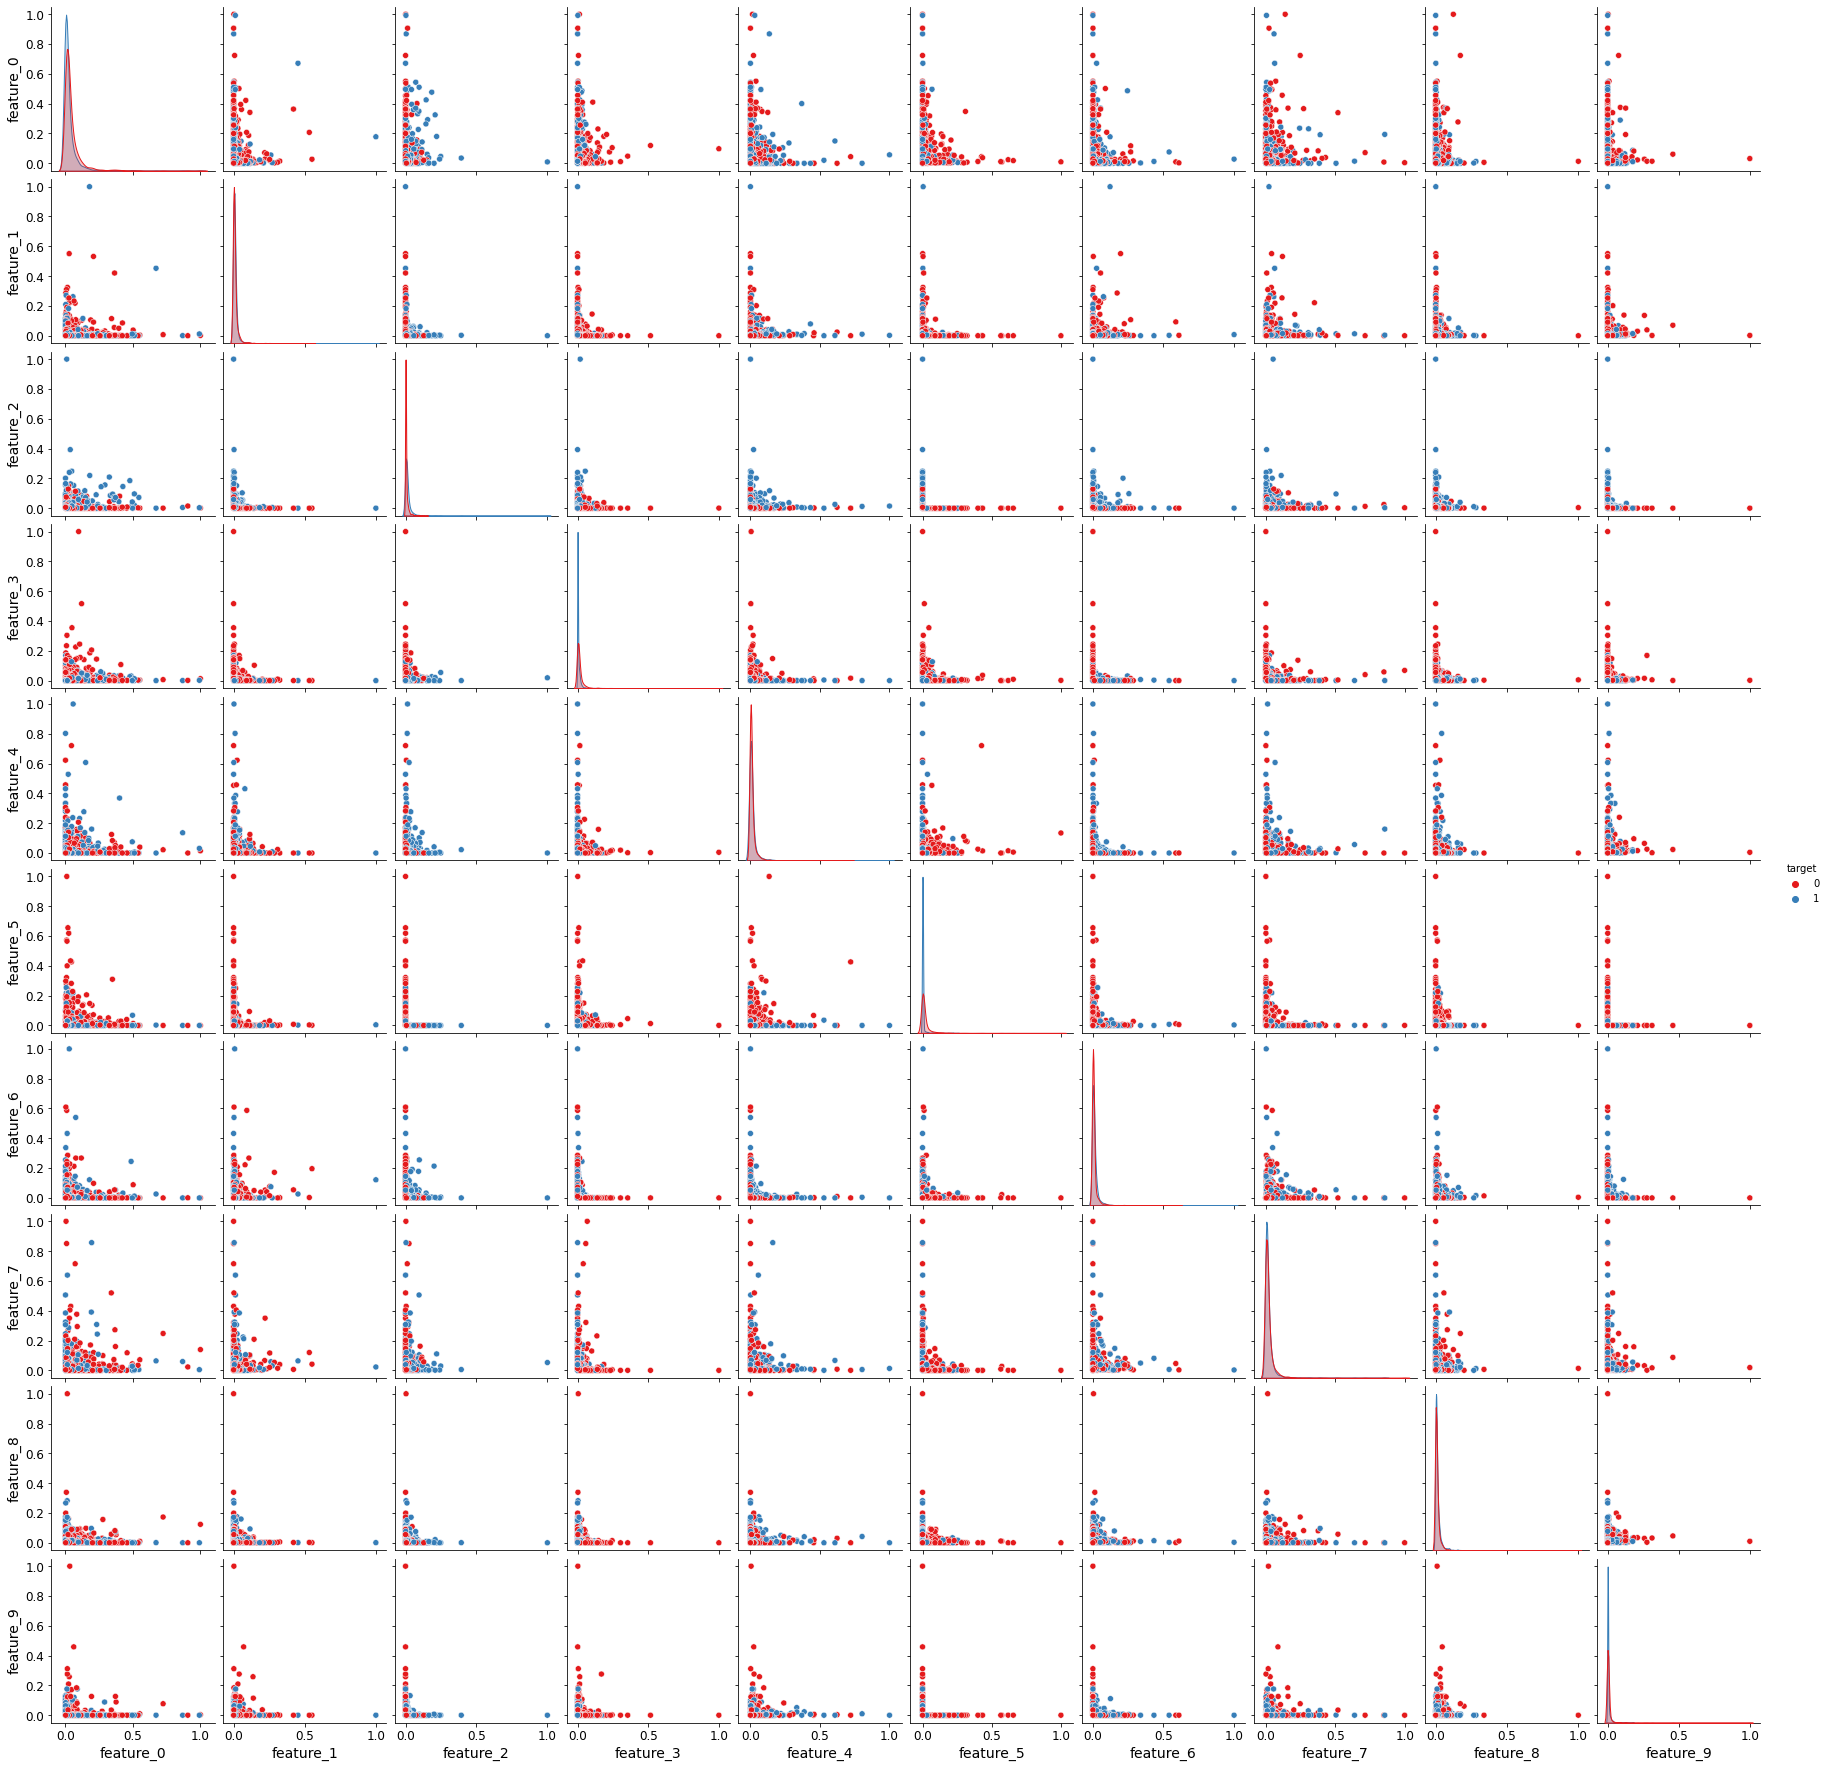

In [6]:
if False:
    # Takes a long time to run
    new_df = df.copy()
    sns.pairplot(new_df, hue=label, palette="Set1")

In [7]:
corr_matrix = df.corr()
corr_matrix[label].sort_values(ascending=False)

target       1.000000
feature_2    0.170154
feature_8    0.060451
feature_6    0.042687
feature_4    0.030563
feature_1   -0.007162
feature_7   -0.014858
feature_9   -0.022936
feature_0   -0.110853
feature_3   -0.168128
feature_5   -0.183133
Name: target, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = get_noisy_nonlinear()
print(X_train.shape)

(2800, 10)


In [9]:
import common_data_analysis

KFold_Score, classifiers, time_taken = common_data_analysis.kfolds_basic_test_all_classifiers(X_train, y_train, scoring="accuracy")

Running: rbf SVM
Time Taken: 0.5389876365661621
Running: NeuralNetwork
Time Taken: 12.390236139297485
Running: DecisionTree
Time Taken: 0.13701248168945312
Running: KNeighborsClassifier
Time Taken: 0.14892840385437012
Running: RandomForestClassifier
Time Taken: 4.235805988311768
Running: AdaBoost
Time Taken: 1.1443381309509277
Final Time elapsed 18.59604525566101


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

In [10]:
common_data_analysis.print_kfolds_basic_test_results(KFold_Score, classifiers, y_train)
print("Number of Instances {}".format(len(X_train)))
for t, c in zip(time_taken, classifiers):
    print("{} \t\t{} seconds".format(c, t))

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.842857,0.876786,0.848214,0.860714,0.837500,0.853214
AdaBoost,0.789286,0.817857,0.796429,0.808929,0.798214,0.802143
KNeighborsClassifier,0.762500,0.791071,0.782143,0.775000,0.755357,0.773214
NeuralNetwork,0.764286,0.753571,0.762500,0.750000,0.771429,0.760357
rbf SVM,0.755357,0.750000,0.762500,0.760714,0.769643,0.759643
DecisionTree,0.717857,0.751786,0.758929,0.766071,0.707143,0.740357


[0.49928571 0.50071429]
Number of Instances 2800
rbf SVM 		0.5391726493835449 seconds
NeuralNetwork 		12.39056134223938 seconds
DecisionTree 		0.13706755638122559 seconds
KNeighborsClassifier 		0.1489851474761963 seconds
RandomForestClassifier 		4.23586106300354 seconds
AdaBoost 		1.1443943977355957 seconds


In [11]:
common_data_analysis.print_kfolds_basic_test_results(KFold_Score, classifiers, y_train)
print("Number of Instances {}".format(len(X_train)))
for t, c in zip(time_taken, classifiers):
    print("{} \t\t{} seconds".format(c, t))

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.842857,0.876786,0.848214,0.860714,0.837500,0.853214
AdaBoost,0.789286,0.817857,0.796429,0.808929,0.798214,0.802143
KNeighborsClassifier,0.762500,0.791071,0.782143,0.775000,0.755357,0.773214
NeuralNetwork,0.764286,0.753571,0.762500,0.750000,0.771429,0.760357
rbf SVM,0.755357,0.750000,0.762500,0.760714,0.769643,0.759643
DecisionTree,0.717857,0.751786,0.758929,0.766071,0.707143,0.740357


[0.49928571 0.50071429]
Number of Instances 2800
rbf SVM 		0.5391726493835449 seconds
NeuralNetwork 		12.39056134223938 seconds
DecisionTree 		0.13706755638122559 seconds
KNeighborsClassifier 		0.1489851474761963 seconds
RandomForestClassifier 		4.23586106300354 seconds
AdaBoost 		1.1443943977355957 seconds
